# The PyData Stack

In this lab, you should analyze the famous [Boston Housing Dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html).  Here's what you should do:

* Load the data into a DataFrame and determine the purpose of the dataset.
* Determine some basic statistics about the features.  Is there any missing data?  How do you know?
* Decide what all the features mean, and their type (hint: explore the stats of each, and the object returned by `load_boston` in the link above).
* Graph histograms of a few appropriate features, and describe what you see.
* Graph scatter plots of the numerical features against the median house price.  What do you take from these graphs?
* Slice the dataset _horizontally_, that is, use boolean indexing to create a sub-DataFrame from your data.  You should find a way to slice it that does something nontrivial: describe why what you've done is interesting (take a look at some of our previous notebooks for examples).
* Create another graph that justifies that the above is interesting.
* Knowing that this datset is typically used in regression to predict the value of the house, slice the data _vertically_, that is, remove some columns that you believe are not helpful for this task.  Justify your reasoning (from the steps you've taken before this).
* Throughout all of the above, discuss what you're seeing in markdown cells, and use markdown appropriately to create headers to break up the analysis.  It's okay if you're wrong or just confused/unsure about your observations--this lab is about experimentation and playfulness with data!

### Importing appropriate libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston

### Loading in the Boston Housing Dataset

In [2]:
df = load_boston()

### Learning basic statistics and features of the dataset

In [3]:
df.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
df.data.shape

(506, 13)

In [5]:
df.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

#### It appears that there are 13 features in the dataset, all of which are described below

In [6]:
print(df.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
df_data = pd.DataFrame(df.data, columns = df.feature_names)

#### Looking at all of the types of the variables, it appears that they are all of the type float, except for the CHAS variable that is instead an ordinal value for if the tract bounds the river (1) or not (0)

In [8]:
df_data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [9]:
df_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [10]:
df_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Looking to see if there is any missing data in the dataset:
Upon looking for null or N/A values in the dataset, it appears that none of the features have any such values and that all of their datums are of the type float, meaning that there is no missing data in the dataset

In [11]:
df_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

### Graphing Histograms
1. The first histogram displays the average number of rooms per property, which follows an normal distribution. Suprisingly, the histogram peaks at roughly 6 rooms per property, which is quite a lot. Maybe a lot of these properties are mutli-family homes?
2. The second histogram displays how close each property is to a Boston City Employement Centre. THe Large majority of them are within 2 miles, indicating that a lot of the properties are near the city's center.
3. The third histogram displays the full-value property tax per 10,000 dollars. As can be observed, a lot of the properties have taxes within the 200-450 per 10,000 dollars range, with there being a larger secondary spike at around 700 per 10,000 dollars, which might be the subset of properties that cost more or are in prime locations in the city.
4. The fourth and final histogram shows the per capita crime rate per town, and as can be seen, the majority of the samples have very low crime rates in their area

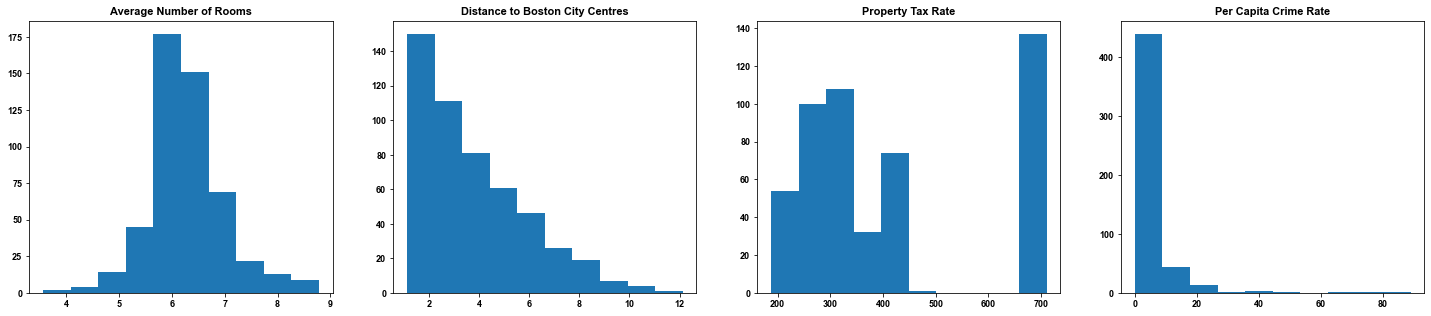

In [12]:
from matplotlib.pyplot import figure

plt.figure(num=None, figsize=(25,5))
plt.subplots_adjust(hspace=0.27, wspace=0.2)

font = {'weight' : 'bold', 'size': 9, 'family':'Arial'}
plt.rc('font', **font)


plt.subplot(1, 4, 1)
plt.hist(df_data['RM'])
plt.title('Average Number of Rooms', fontweight='bold', family='Arial', fontsize = 11)

plt.subplot(1, 4, 2)
plt.hist(df_data['DIS'])
plt.title('Distance to Boston City Centres', fontweight='bold', family='Arial', fontsize = 11)

plt.subplot(1, 4, 3)
plt.hist(df_data['TAX'])
plt.title('Property Tax Rate', fontweight='bold', family='Arial', fontsize = 11)

plt.subplot(1, 4, 4)
plt.hist(df_data['CRIM'])
plt.title('Per Capita Crime Rate', fontweight='bold', family='Arial', fontsize = 11)

plt.show()

### Adding Median Value of Houses to Our Dataset

In [13]:
df_data['MEDV'] = df.target

### Scatter Plots Between the Median House Price and Numerical Features Features
As can be seen from the below scatter plots, as few features have a stronger relationship with the Median House Price, namely the Average Number of Rooms, Distance to Boston City Centres, Per Capita Crime Rate, Percent Lower Status of the Town, and the Number of Properties Built Before 1940. I would assume that this is due to the fact that all of these features are related to the town the property is in, its commutability to different locations in the city, and the general size and age of the house, which all greatly affect the price at which a house is listed at.

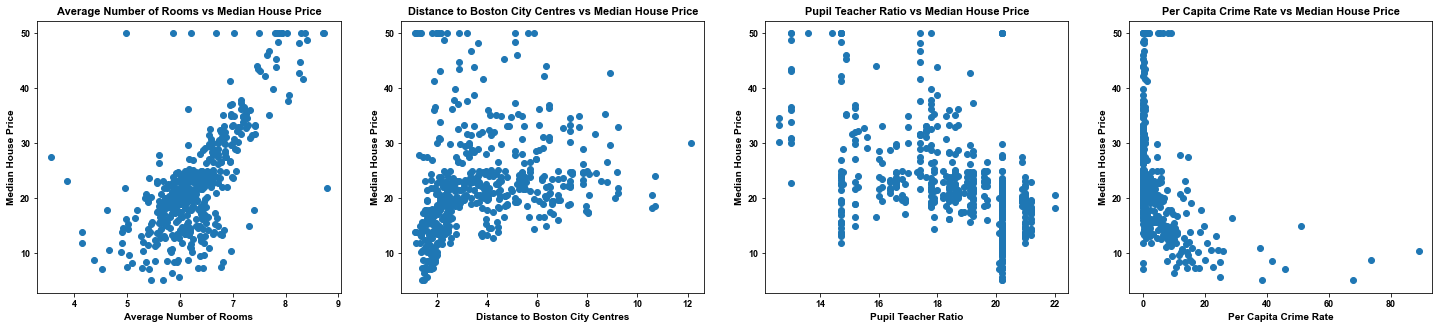

In [14]:
plt.figure(num=None, figsize=(25,5))
plt.subplots_adjust(hspace=0.27, wspace=0.2)

plt.subplot(1, 4, 1)
plt.scatter(df_data['RM'], df_data['MEDV'])
plt.title('Average Number of Rooms vs Median House Price', fontweight='bold', family='Arial', fontsize = 11)
plt.xlabel('Average Number of Rooms', fontweight='bold', family='Arial', fontsize = 10)
plt.ylabel('Median House Price', fontweight='bold', family='Arial', fontsize = 10)

plt.subplot(1, 4, 2)
plt.scatter(df_data['DIS'], df_data['MEDV'])
plt.title('Distance to Boston City Centres vs Median House Price', fontweight='bold', family='Arial', fontsize = 11)
plt.xlabel('Distance to Boston City Centres', fontweight='bold', family='Arial', fontsize = 10)
plt.ylabel('Median House Price', fontweight='bold', family='Arial', fontsize = 10)

plt.subplot(1, 4, 3)
plt.scatter(df_data['PTRATIO'], df_data['MEDV'])
plt.title('Pupil Teacher Ratio vs Median House Price', fontweight='bold', family='Arial', fontsize = 11)
plt.xlabel('Pupil Teacher Ratio', fontweight='bold', family='Arial', fontsize = 10)
plt.ylabel('Median House Price', fontweight='bold', family='Arial', fontsize = 10)

plt.subplot(1, 4, 4)
plt.scatter(df_data['CRIM'], df_data['MEDV'])
plt.title('Per Capita Crime Rate vs Median House Price', fontweight='bold', family='Arial', fontsize = 11)
plt.xlabel('Per Capita Crime Rate', fontweight='bold', family='Arial', fontsize = 10)
plt.ylabel('Median House Price', fontweight='bold', family='Arial', fontsize = 10)

plt.show()

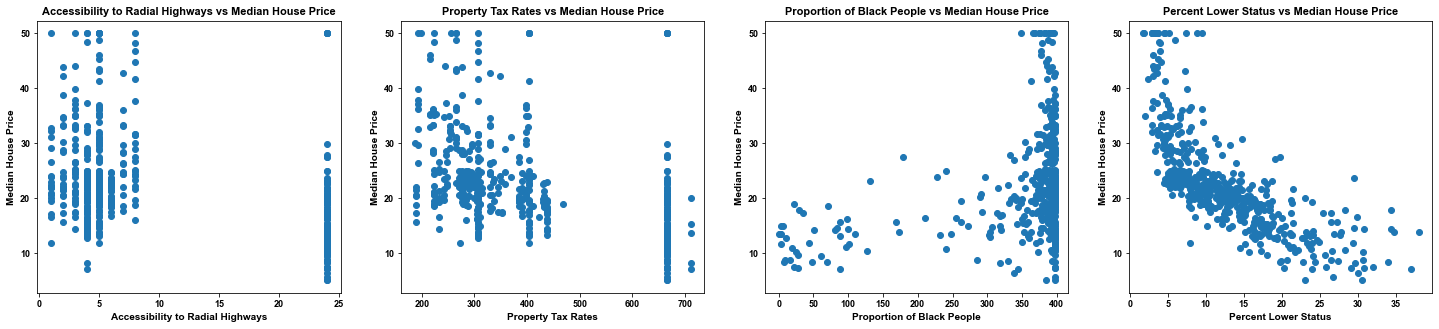

In [15]:
plt.figure(num=None, figsize=(25,5))
plt.subplots_adjust(hspace=0.27, wspace=0.2)


plt.subplot(1, 4, 1)
plt.scatter(df_data['RAD'], df_data['MEDV'])
plt.title('Accessibility to Radial Highways vs Median House Price', fontweight='bold', family='Arial', fontsize = 11)
plt.xlabel('Accessibility to Radial Highways', fontweight='bold', family='Arial', fontsize = 10)
plt.ylabel('Median House Price', fontweight='bold', family='Arial', fontsize = 10)

plt.subplot(1, 4, 2)
plt.scatter(df_data['TAX'], df_data['MEDV'])
plt.title('Property Tax Rates vs Median House Price', fontweight='bold', family='Arial', fontsize = 11)
plt.xlabel('Property Tax Rates', fontweight='bold', family='Arial', fontsize = 10)
plt.ylabel('Median House Price', fontweight='bold', family='Arial', fontsize = 10)

plt.subplot(1, 4, 3)
plt.scatter(df_data['B'], df_data['MEDV'])
plt.title('Proportion of Black People vs Median House Price', fontweight='bold', family='Arial', fontsize = 11)
plt.xlabel('Proportion of Black People', fontweight='bold', family='Arial', fontsize = 10)
plt.ylabel('Median House Price', fontweight='bold', family='Arial', fontsize = 10)

plt.subplot(1, 4, 4)
plt.scatter(df_data['LSTAT'], df_data['MEDV'])
plt.title('Percent Lower Status vs Median House Price', fontweight='bold', family='Arial', fontsize = 11)
plt.xlabel('Percent Lower Status', fontweight='bold', family='Arial', fontsize = 10)
plt.ylabel('Median House Price', fontweight='bold', family='Arial', fontsize = 10)

plt.show()

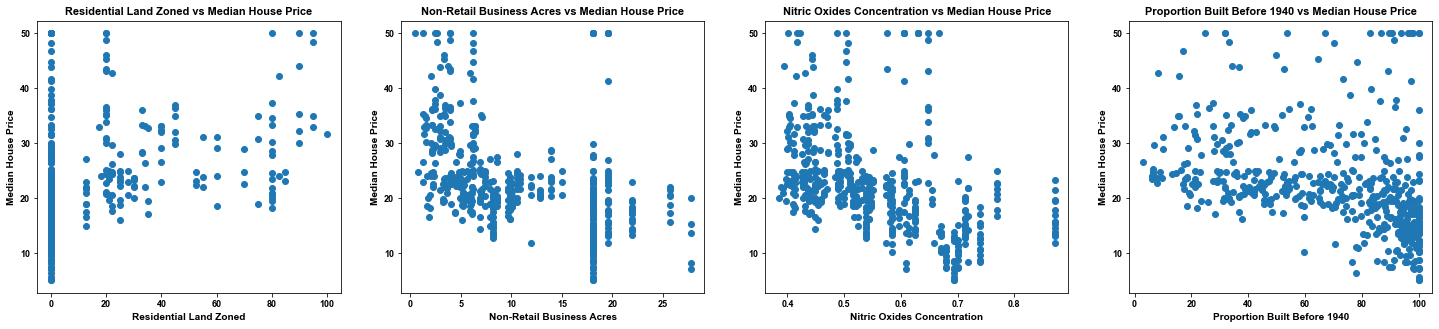

In [16]:
plt.figure(num=None, figsize=(25,5))
plt.subplots_adjust(hspace=0.27, wspace=0.2)


plt.subplot(1, 4, 1)
plt.scatter(df_data['ZN'], df_data['MEDV'])
plt.title('Residential Land Zoned vs Median House Price', fontweight='bold', family='Arial', fontsize = 11)
plt.xlabel('Residential Land Zoned', fontweight='bold', family='Arial', fontsize = 10)
plt.ylabel('Median House Price', fontweight='bold', family='Arial', fontsize = 10)

plt.subplot(1, 4, 2)
plt.scatter(df_data['INDUS'], df_data['MEDV'])
plt.title('Non-Retail Business Acres vs Median House Price', fontweight='bold', family='Arial', fontsize = 11)
plt.xlabel('Non-Retail Business Acres', fontweight='bold', family='Arial', fontsize = 10)
plt.ylabel('Median House Price', fontweight='bold', family='Arial', fontsize = 10)

plt.subplot(1, 4, 3)
plt.scatter(df_data['NOX'], df_data['MEDV'])
plt.title('Nitric Oxides Concentration vs Median House Price', fontweight='bold', family='Arial', fontsize = 11)
plt.xlabel('Nitric Oxides Concentration', fontweight='bold', family='Arial', fontsize = 10)
plt.ylabel('Median House Price', fontweight='bold', family='Arial', fontsize = 10)

plt.subplot(1, 4, 4)
plt.scatter(df_data['AGE'], df_data['MEDV'])
plt.title('Proportion Built Before 1940 vs Median House Price', fontweight='bold', family='Arial', fontsize = 11)
plt.xlabel('Proportion Built Before 1940', fontweight='bold', family='Arial', fontsize = 10)
plt.ylabel('Median House Price', fontweight='bold', family='Arial', fontsize = 10)

plt.show()

### Slicing the Data Vertically
Based on the above scatter plots of all of the features vs the median house price, the features that I have decided the keep in the dataset, while removing the rest, are the Average Number of Rooms, Distance to Boston City Centres, Per Capita Crime Rate, Percent Lower Status of the Town, and the Number of Properties Built Before 1940, because these were the features that had the strongest relationship with the median house price. Thus, since we are trying to predict the median house price using the data we have, I believe that by dropping the remaining features, we will clear the dataset of features that are not as directly related to the median house price as the features kept in the dataset, and remove any loosely related data from the dataset, that the model might have latched on to otherwise and potentially skewed the accuracy of the median house price prediction.

In [17]:
df_data_filtered = df_data.iloc[:, 0:13]
df_data_filtered = df_data_filtered.drop(['ZN', 'INDUS', 'CHAS', 'NOX', 'RAD', 'TAX', 'PTRATIO', 'B'], axis=1)
df_data_filtered

,CRIM,RM,AGE,DIS,LSTAT
0,0.00632,6.575,65.2,4.0900,4.98
1,0.02731,6.421,78.9,4.9671,9.14
2,0.02729,7.185,61.1,4.9671,4.03
3,0.03237,6.998,45.8,6.0622,2.94
4,0.06905,7.147,54.2,6.0622,5.33
...,...,...,...,...,...
501,0.06263,6.593,69.1,2.4786,9.67
502,0.04527,6.120,76.7,2.2875,9.08
503,0.06076,6.976,91.0,2.1675,5.64
504,0.10959,6.794,89.3,2.3889,6.48
